In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.traffic.v3.environment import TrafficModel, Car
from src.traffic.v3.util.network import create_braess_network, create_double_braess_network

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Debugging

In [3]:
number_of_steps = 15

network = create_braess_network()
cars = {
    0: Car( 0, 0, 3, 1, anticipation_strategy='edge', position=((0, 1), 0), verbose=True),
    1: Car( 1, 0, 3, 1, anticipation_strategy='edge', position=((1, 2), 0), verbose=True),
    # 2: Car( 2, 0, 3, 1, anticipation_strategy='edge', position=((1, 2), 0), verbose=True)
}

model = TrafficModel(network, cars)

step_stats, car_stats = model.run_sequentially(number_of_steps)

Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 1 at 2 chooses 3.
Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 0 at 1 chooses 2.
Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.12}.
Car 0 at 2 chooses 3.
Latencies: {(0, 1): 2.06, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 1 at 0 chooses 1.
Latencies: {(0, 1): 2.12, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.0}.
Car 0 at 0 chooses 1.
Latencies: {(0, 1): 2.06, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.0}.
Car 1 at 1 chooses 2.
Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 1 at 2 chooses 3.
Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 0 at 1 chooses 2.
Latencies: {(0, 1): 2.0, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.12}.
Car 0 at 2 chooses 3.
Latencies: {(0, 1): 2.06, (0, 2): 10, (1, 2): 1, (1, 3): 10, (2, 3): 2.06}.
Car 1 at 0 chooses 1.
Latencies: {(0, 1): 2.12, (0

In [4]:
step_stats

route                 flow                                  toll  \
               0             1 (0, 1) (0, 2) (1, 2) (1, 3) (2, 3)    (0, 1)   
0             []            []      1      0      1      0      0  0.003000   
1      [1, 2, 3]        [2, 3]      0      0      1      0      1  0.002430   
2         [2, 3]        [2, 3]      0      0      0      0      2  0.002187   
3         [2, 3]        [2, 3]      0      0      0      0      2  0.001968   
4         [2, 3]  [0, 1, 2, 3]      1      0      0      0      1  0.007294   
5   [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0  0.017308   
6   [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0  0.021578   
7   [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0  0.023178   
8      [1, 2, 3]        [2, 3]      0      0      1      0      1  0.018774   
9         [2, 3]        [2, 3]      0      0      0      0      2  0.016897   
10        [2, 3]        [2, 3]      0      0      0      0      2  0.015207   
11        [2, 3]  [0, 1, 2, 3]      1      0      0      0      1  0.018018   
12  [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0  0.025994   
13  [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0  0.029395   
14  [0, 1, 2, 3]     [1, 2, 3]      1      0      1      0      0  0.029510   

                                  latency                              
   (0, 2) (1, 2) (1, 3)    (2, 3)  (0, 1) (0, 2) (1, 2) (1, 3) (2, 3)  
0     0.0    0.0    0.0  0.000000    2.06     10      1     10   2.00  
1     0.0    0.0    0.0  0.005700    2.00     10      1     10   2.06  
2     0.0    0.0    0.0  0.016017    2.00     10      1     10   2.12  
3     0.0    0.0    0.0  0.020415    2.00     10      1     10   2.12  
4     0.0    0.0    0.0  0.022236    2.06     10      1     10   2.06  
5     0.0    0.0    0.0  0.018011    2.12     10      1     10   2.00  
6     0.0    0.0    0.0  0.016210    2.12     10      1     10   2.00  
7     0.0    0.0    0.0  0.014589    2.06     10      1     10   2.00  
8     0.0    0.0    0.0  0.017517    2.00     10      1     10   2.06  
9     0.0    0.0    0.0  0.025589    2.00     10      1     10   2.12  
10    0.0    0.0    0.0  0.029030    2.00     10      1     10   2.12  
11    0.0    0.0    0.0  0.029214    2.06     10      1     10   2.06  
12    0.0    0.0    0.0  0.023664    2.12     10      1     10   2.00  
13    0.0    0.0    0.0  0.021297    2.12     10      1     10   2.00  
14    0.0    0.0    0.0  0.019168    2.06     10      1     10   2.00

In [5]:
car_stats

,step,car_id,source,target,route,travel_time
0,3,1,0,3,"(1, 2, 3)",3
1,4,0,0,3,"(0, 1, 2, 3)",4
2,10,1,0,3,"(0, 1, 2, 3)",7
3,11,0,0,3,"(0, 1, 2, 3)",7


In [6]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time
route,,,,,
"(0, 1, 2, 3)",3,3,3,3,3
"(1, 2, 3)",1,1,1,1,1


<Axes: >

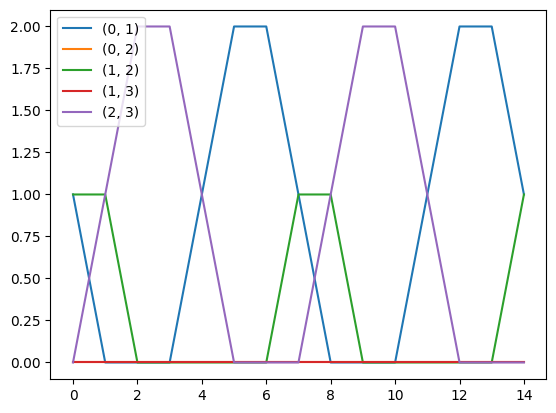

In [7]:
step_stats['flow'].plot()

### Single Braess

In [5]:
def get_cars():
    return {
             0: Car( 0, 0, 3, 1/4, position=((0, 1), 0 / 4)),
             1: Car( 1, 0, 3, 1/4, position=((0, 1), 1 / 4)),
             2: Car( 2, 0, 3, 1/4, position=((0, 1), 2 / 4)),
             3: Car( 3, 0, 3, 1/4, position=((0, 1), 3 / 4)),
             4: Car( 4, 0, 3, 1/11, position=((1, 3), 0 / 11)),
             5: Car( 5, 0, 3, 1/11, position=((1, 3), 1 / 11)),
             6: Car( 6, 0, 3, 1/11, position=((1, 3), 2 / 11)),
             7: Car( 7, 0, 3, 1/11, position=((1, 3), 3 / 11)),
             8: Car( 8, 0, 3, 1/11, position=((1, 3), 4 / 11)),
             9: Car( 9, 0, 3, 1/11, position=((1, 3), 5 / 11)),
            10: Car(10, 0, 3, 1/11, position=((1, 3), 6 / 11)),
            11: Car(11, 0, 3, 1/11, position=((1, 3), 7 / 11)),
            12: Car(12, 0, 3, 1/11, position=((1, 3), 8 / 11)),
            13: Car(13, 0, 3, 1/11, position=((1, 3), 9 / 11)),
            14: Car(14, 0, 3, 1/11, position=((1, 3), 10 / 11)),
            15: Car(15, 0, 3, 1/11, position=((0, 2), 0 / 11)),
            16: Car(16, 0, 3, 1/11, position=((0, 2), 1 / 11)),
            17: Car(17, 0, 3, 1/11, position=((0, 2), 2 / 11)),
            18: Car(18, 0, 3, 1/11, position=((0, 2), 3 / 11)),
            19: Car(19, 0, 3, 1/11, position=((0, 2), 4 / 11)),
            20: Car(20, 0, 3, 1/11, position=((0, 2), 5 / 11)),
            21: Car(21, 0, 3, 1/11, position=((0, 2), 6 / 11)),
            22: Car(22, 0, 3, 1/11, position=((0, 2), 7 / 11)),
            23: Car(23, 0, 3, 1/11, position=((0, 2), 8 / 11)),
            24: Car(24, 0, 3, 1/11, position=((0, 2), 9 / 11)),
            25: Car(25, 0, 3, 1/11, position=((0, 2), 10 / 11)),
            26: Car(26, 0, 3, 1/4, position=((2, 3), 0 / 4)),
            27: Car(27, 0, 3, 1/4, position=((2, 3), 1 / 4)),
            28: Car(28, 0, 3, 1/4, position=((2, 3), 2 / 4)),
            29: Car(29, 0, 3, 1/4, position=((2, 3), 3 / 4)),
        }
number_of_steps = 1000

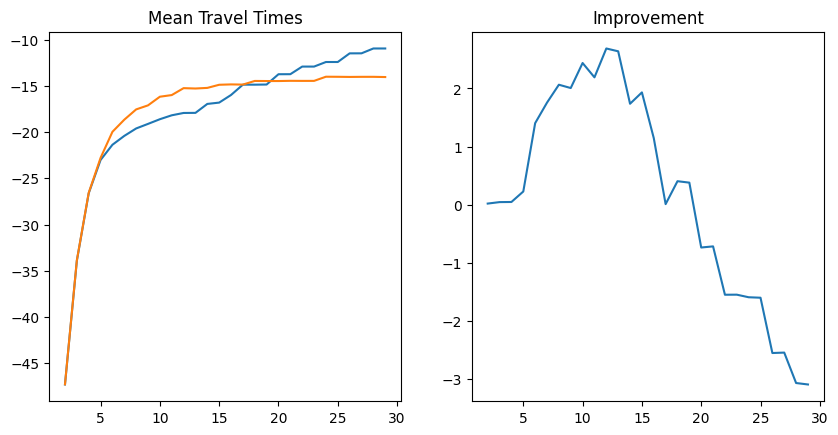

Best improvement found with capacity: 12


In [31]:
number_of_steps = 1000

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in range(2, 30):
    for allowed_edge in [True, False]:
        model = TrafficModel(create_braess_network(capacity=capacity), get_cars())
        model.set_edge_restriction((1, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(10)
ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [13]:
model = TrafficModel(create_braess_network(capacity=13), get_cars())
model.set_edge_restriction((1, 2), allowed=True)
step_stats, car_stats = model.run_sequentially(number_of_steps)

In [14]:
(-car_stats["travel_time"]).mean()

-18.144166157605376

In [15]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time
route,,,,,
"(0, 1, 2, 3)",1599,1599,1599,1599,1599
"(0, 1, 3)",7,7,7,7,7
"(0, 2, 3)",16,16,16,16,16
"(1, 3)",11,11,11,11,11
"(2, 3)",4,4,4,4,4


In [16]:
step_stats

route                                                            \
                0          1          2             3             4       5   
0              []         []         []            []            []      []   
1              []         []         []     [1, 2, 3]            []      []   
2              []         []  [1, 2, 3]        [2, 3]            []      []   
3              []  [1, 2, 3]     [2, 3]        [2, 3]            []      []   
4       [1, 2, 3]     [2, 3]     [2, 3]        [2, 3]            []      []   
..            ...        ...        ...           ...           ...     ...   
995        [2, 3]     [2, 3]     [2, 3]        [2, 3]  [0, 1, 2, 3]  [2, 3]   
996        [2, 3]     [2, 3]     [2, 3]        [2, 3]     [1, 2, 3]  [2, 3]   
997  [0, 1, 2, 3]     [2, 3]     [2, 3]        [2, 3]        [2, 3]  [2, 3]   
998  [0, 1, 2, 3]     [2, 3]     [2, 3]  [0, 1, 2, 3]        [2, 3]  [2, 3]   
999  [0, 1, 2, 3]     [2, 3]     [2, 3]  [0, 1, 2, 3]        [2, 3]  [2, 3]   

                                                             ...      toll  \
                6             7             8             9  ...    (0, 1)   
0              []            []            []            []  ...  0.092308   
1              []            []            []            []  ...  0.405032   
2              []            []            []            []  ...  0.689572   
3              []            []            []            []  ...  0.955621   
4              []            []            []            []  ...  1.209537   
..            ...           ...           ...           ...  ...       ...   
995        [2, 3]  [0, 1, 2, 3]        [2, 3]        [2, 3]  ...  3.258825   
996        [2, 3]  [0, 1, 2, 3]  [0, 1, 2, 3]  [0, 1, 2, 3]  ...  3.274359   
997  [0, 1, 2, 3]     [1, 2, 3]  [0, 1, 2, 3]  [0, 1, 2, 3]  ...  3.283532   
998  [0, 1, 2, 3]        [2, 3]  [0, 1, 2, 3]  [0, 1, 2, 3]  ...  3.246694   
999  [0, 1, 2, 3]        [2, 3]  [0, 1, 2, 3]  [0, 1, 2, 3]  ...  3.268241   

                                     latency                                 
    (0, 2) (1, 2) (1, 3)    (2, 3)    (0, 1) (0, 2) (1, 2) (1, 3)    (2, 3)  
0      0.0    0.0    0.0  0.092308  3.846154     10      1     10  3.846154  
1      0.0    0.0    0.0  0.298754  4.307692     10      1     10  3.846154  
2      0.0    0.0    0.0  0.540482  4.769231     10      1     10  4.307692  
3      0.0    0.0    0.0  0.778441  5.230769     10      1     10  4.769231  
4      0.0    0.0    0.0  1.013927  5.692308     10      1     10  5.230769  
..     ...    ...    ...       ...       ...    ...    ...    ...       ...  
995    0.0    0.0    0.0  3.080251  8.923077     10      1     10  8.461538  
996    0.0    0.0    0.0  3.033960  8.923077     10      1     10  8.000000  
997    0.0    0.0    0.0  2.952574  8.923077     10      1     10  8.000000  
998    0.0    0.0    0.0  2.995907  8.461538     10      1     10  8.461538  
999    0.0    0.0    0.0  3.024606  8.923077     10      1     10  8.461538  

[1000 rows x 45 columns]

### Double Braess

In [17]:
def get_cars(capacity=100):
    return {
    # A -> 0
    1: Car(1, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), 0)),
    2: Car(2, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    3: Car(3, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    4: Car(4, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 0 -> 1
    5: Car(5, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), 0)),
    6: Car(6, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    7: Car(7, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    8: Car(8, 0, 3, 1/(2 + (6 / capacity) * 4), position=((0, 1), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 2 -> 3
    9: Car(9, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), 0)),
    10: Car(10, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    11: Car(11, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    12: Car(12, 0, 3, 1/(2 + (6 / capacity) * 4), position=((2, 3), (1/(2 + (6 / capacity) * 4)) * 0.75)),
    # 0 -> 2
    13: Car(13, 0, 3, 1/10, position=((0, 2), 0)),
    14: Car(14, 0, 3, 1/10, position=((0, 2), 0.5)),
    # 1 -> 3
    15: Car(15, 0, 3, 1/10, position=((1, 3), 0)),
    16: Car(16, 0, 3, 1/10, position=((1, 3), 0.5)),
    # 2 -> B
    17: Car(17, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), 0)),
    18: Car(18, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), (1/(2 + (6 / capacity) * 4)) * 0.25)),
    19: Car(19, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=((2, 'B'), (1/(2 + (6 / capacity) * 4)) * 0.5)),
    20: Car(20, 'A', 'B', 1/(2 + (6 / capacity) * 4), position=(('A', 0), (1/(2 + (6 / capacity) * 4)) * 0.75 )),
    # A -> 2
    21: Car(21, 'A', 'B', 1/19, position=(('A', 2), 0)),
    22: Car(22, 'A', 'B', 1/19, position=(('A', 2), (1 / 19) * 0.25)),
    # 0 -> B
    23: Car(23, 'A', 'B', 1/19, position=((0, 'B'), 0)),
    24: Car(24, 'A', 'B', 1/19, position=((0, 'B'), (1 / 19) * 0.25))
}

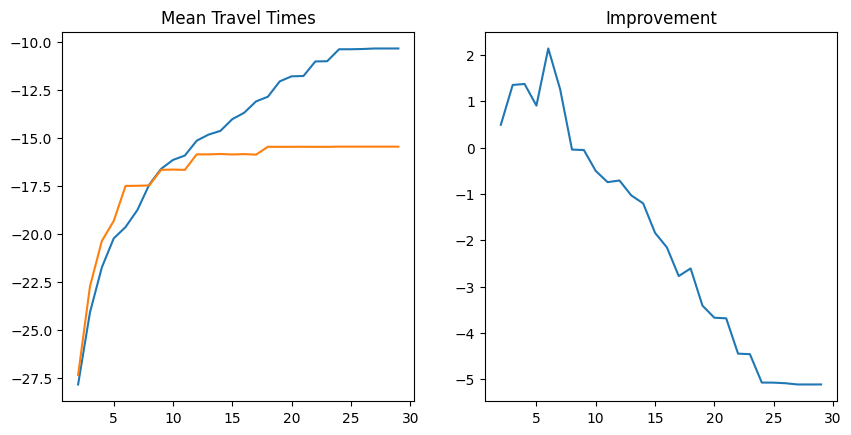

Best improvement found with capacity: 6


In [63]:
number_of_steps = 1000

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in range(2, 30):
    for allowed_edge in [True, False]:
        model = TrafficModel(create_double_braess_network(capacity=capacity), get_cars())
        model.set_edge_restriction((1, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(10)
ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [23]:
model = TrafficModel(create_double_braess_network(capacity=6), get_cars(capacity=6))
model.set_edge_restriction((0, 2), allowed=False)
model.set_edge_restriction((1, 2), allowed=False)
step_stats, car_stats = model.run_sequentially(number_of_steps)

In [24]:
(-car_stats["travel_time"]).mean()

-20.794736842105262

In [25]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time
route,,,,,
"(0, 1, 3)",623,623,623,623,623
"(0, 2, 3)",2,2,2,2,2
"(0, B)",2,2,2,2,2
"(1, 3)",2,2,2,2,2
"(2, 3)",4,4,4,4,4
"(2, B)",3,3,3,3,3
"(A, 0, B)",264,264,264,264,264
"(A, 2, B)",240,240,240,240,240


In [89]:
car_stats.groupby(["route"])["travel_time"].mean()

route
(0, 1, 3)       14.938272
(0, 2, 3)       14.933162
(0, B)          18.500000
(1, 3)           7.500000
(2, 3)           5.250000
(2, B)           5.333333
(A, 0, 2, B)    21.062724
(A, 2, B)       26.500000
Name: travel_time, dtype: float64